In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.formula.api as smf
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

from plotnine import *
from mizani.formatters import percent_format, comma_format

In [3]:
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

In [4]:
prices_monthly = pd.read_sql_query(
    sql="""
        SELECT symbol, date, ret_excess, mktcap, mktcap_lag, risk_free
        FROM prices_monthly
    """,
    con=tidy_finance,
    parse_dates={"date"}
).dropna()

print(f"Monthly returns: {len(prices_monthly):,} observations")
print(f"Unique stocks: {prices_monthly['symbol'].nunique():,}")
print(f"Date range: {prices_monthly['date'].min():%Y-%m} to {prices_monthly['date'].max():%Y-%m}")

Monthly returns: 165,499 observations
Unique stocks: 1,457
Date range: 2010-02 to 2023-12


In [5]:
comp_vn = pd.read_sql_query(
    sql="""
        SELECT symbol, datadate, be, op, inv
        FROM comp_vn
    """,
    con=tidy_finance,
    parse_dates={"datadate"}
).dropna()

print(f"Fundamentals: {len(comp_vn):,} firm-year observations")
print(f"Unique firms: {comp_vn['symbol'].nunique():,}")

Fundamentals: 18,108 firm-year observations
Unique firms: 1,496


In [6]:
def construct_sorting_variables(prices_monthly, comp_vn):
    """
    Construct sorting variables following Fama-French methodology.
    
    Parameters
    ----------
    prices_monthly : pd.DataFrame
        Monthly stock returns with market cap
    comp_vn : pd.DataFrame
        Company fundamentals with book equity, profitability, investment
        
    Returns
    -------
    pd.DataFrame
        Sorting variables aligned with July 1st formation dates
    """
    
    # 1. Size: June market capitalization
    # Portfolio formation is July 1st, so we use June market cap
    size = (prices_monthly
        .query("date.dt.month == 6")
        .assign(
            sorting_date=lambda x: x["date"] + pd.offsets.MonthBegin(1)
        )
        [["symbol", "sorting_date", "mktcap"]]
        .rename(columns={"mktcap": "size"})
    )
    
    print(f"Size observations: {len(size):,}")
    
    # 2. Market Equity: December market cap for B/M calculation
    # December t-1 market cap is used with fiscal year t-1 book equity
    # This is then used for July t portfolio formation
    market_equity = (prices_monthly
        .query("date.dt.month == 12")
        .assign(
            # December year t-1 maps to July year t formation
            sorting_date=lambda x: x["date"] + pd.offsets.MonthBegin(7)
        )
        [["symbol", "sorting_date", "mktcap"]]
        .rename(columns={"mktcap": "me"})
    )
    
    print(f"Market equity observations: {len(market_equity):,}")
    
    # 3. Book-to-Market and other characteristics
    # Fiscal year t-1 data is used for July t portfolio formation
    book_to_market = (comp_vn
        .assign(
            # Fiscal year-end + 6 months = July formation
            sorting_date=lambda x: pd.to_datetime(
                (x["datadate"].dt.year + 1).astype(str) + "-07-01"
            )
        )
        .merge(market_equity, on=["symbol", "sorting_date"], how="inner")
        .assign(
            # Scale book equity to match market equity units
            # BE is in VND, ME is in millions VND
            bm=lambda x: x["be"] / (x["me"] * 1e9)
        )
        [["symbol", "sorting_date", "me", "bm", "op", "inv"]]
    )
    
    print(f"Book-to-market observations: {len(book_to_market):,}")
    
    # 4. Merge size with characteristics
    sorting_variables = (size
        .merge(book_to_market, on=["symbol", "sorting_date"], how="inner")
        .dropna()
        .drop_duplicates(subset=["symbol", "sorting_date"])
    )
    
    return sorting_variables

sorting_variables = construct_sorting_variables(prices_monthly, comp_vn)

print(f"\nFinal sorting variables: {len(sorting_variables):,} stock-years")
print(f"Sorting date range: {sorting_variables['sorting_date'].min():%Y-%m} to {sorting_variables['sorting_date'].max():%Y-%m}")

Size observations: 13,756
Market equity observations: 14,286
Book-to-market observations: 13,389

Final sorting variables: 12,046 stock-years
Sorting date range: 2011-07 to 2023-07


In [7]:
print("Sorting Variable Summary Statistics:")
print(sorting_variables[["size", "bm", "op", "inv"]].describe().round(4))

# Check for extreme values that might indicate data issues
print(f"\nB/M Median: {sorting_variables['bm'].median():.4f}")
print(f"B/M 1st percentile: {sorting_variables['bm'].quantile(0.01):.4f}")
print(f"B/M 99th percentile: {sorting_variables['bm'].quantile(0.99):.4f}")

Sorting Variable Summary Statistics:
              size          bm          op         inv
count   12046.0000  12046.0000  12046.0000  12046.0000
mean     2225.5648      1.7033      0.1852      0.1322
std     14680.4225      3.8683      0.2782      2.5410
min         0.4864      0.0014     -0.7529     -0.9569
25%        62.7556      0.7595      0.0309     -0.0495
50%       182.6410      1.1849      0.1367      0.0342
75%       641.8896      1.8853      0.2952      0.1582
max    426020.9817    272.1893      1.4256    261.3355

B/M Median: 1.1849
B/M 1st percentile: 0.1710
B/M 99th percentile: 8.0262


In [8]:
# Check BEFORE winsorization
print("BEFORE Winsorization:")
print(sorting_variables[["size", "bm", "op", "inv"]].describe().round(4))

# Apply winsorization
def winsorize_characteristics(df, columns, limits=(0.01, 0.99)):
    """
    Apply winsorization using pandas clip.
    """
    df = df.copy()
    for col in columns:
        if col in df.columns:
            lower = df[col].quantile(limits[0])
            upper = df[col].quantile(limits[1])
            df[col] = df[col].clip(lower=lower, upper=upper)
            print(f"  {col}: clipped to [{lower:.4f}, {upper:.4f}]")
    return df

sorting_variables = winsorize_characteristics(
    sorting_variables,
    columns=["bm", "op", "inv"],  # Don't winsorize size
    limits=(0.01, 0.99)
)

# Check AFTER winsorization
print("\nAFTER Winsorization:")
print(sorting_variables[["size", "bm", "op", "inv"]].describe().round(4))

BEFORE Winsorization:
              size          bm          op         inv
count   12046.0000  12046.0000  12046.0000  12046.0000
mean     2225.5648      1.7033      0.1852      0.1322
std     14680.4225      3.8683      0.2782      2.5410
min         0.4864      0.0014     -0.7529     -0.9569
25%        62.7556      0.7595      0.0309     -0.0495
50%       182.6410      1.1849      0.1367      0.0342
75%       641.8896      1.8853      0.2952      0.1582
max    426020.9817    272.1893      1.4256    261.3355
  bm: clipped to [0.1710, 8.0262]
  op: clipped to [-0.7319, 1.2192]
  inv: clipped to [-0.3990, 1.5195]

AFTER Winsorization:
              size          bm          op         inv
count   12046.0000  12046.0000  12046.0000  12046.0000
mean     2225.5648      1.5544      0.1837      0.0894
std     14680.4225      1.2843      0.2705      0.2721
min         0.4864      0.1710     -0.7319     -0.3990
25%        62.7556      0.7595      0.0309     -0.0495
50%       182.6410      1.

In [9]:
def assign_portfolio(data, sorting_variable, percentiles):
    """Assign portfolios to a bin according to a sorting variable."""
    
    # Get the values
    values = data[sorting_variable].dropna()
    
    if len(values) == 0:
        return pd.Series([np.nan] * len(data), index=data.index)
    
    # Calculate breakpoints
    breakpoints = values.quantile(percentiles, interpolation="linear")
    
    # Handle duplicate breakpoints by using unique values
    unique_breakpoints = np.unique(breakpoints)
    
    # If all values are the same, assign all to portfolio 1
    if len(unique_breakpoints) <= 1:
        return pd.Series([1] * len(data), index=data.index)
    
    # Set boundaries to -inf and +inf
    unique_breakpoints.iloc[0] = -np.inf
    unique_breakpoints.iloc[unique_breakpoints.size-1] = np.inf
    
    # Assign to bins
    assigned = pd.cut(
        data[sorting_variable],
        bins=unique_breakpoints,
        labels=pd.Series(range(1, breakpoints.size)),
        include_lowest=True,
        right=False
    )
    
    return assigned

In [10]:
# Check the distribution of characteristics BEFORE portfolio assignment
print("Operating Profitability Distribution:")
print(sorting_variables["op"].describe())
print(f"\nUnique OP values: {sorting_variables['op'].nunique()}")

print("\nInvestment Distribution:")
print(sorting_variables["inv"].describe())
print(f"\nUnique INV values: {sorting_variables['inv'].nunique()}")

# Check breakpoints for a specific date
test_date = sorting_variables["sorting_date"].iloc[0]
test_data = sorting_variables.query("sorting_date == @test_date")

print(f"\nBreakpoints for {test_date}:")
print(f"OP 30th percentile: {test_data['op'].quantile(0.3):.4f}")
print(f"OP 70th percentile: {test_data['op'].quantile(0.7):.4f}")
print(f"INV 30th percentile: {test_data['inv'].quantile(0.3):.4f}")
print(f"INV 70th percentile: {test_data['inv'].quantile(0.7):.4f}")

Operating Profitability Distribution:
count    12046.000000
mean         0.183738
std          0.270509
min         -0.731888
25%          0.030913
50%          0.136675
75%          0.295185
max          1.219223
Name: op, dtype: float64

Unique OP values: 11804

Investment Distribution:
count    12046.000000
mean         0.089388
std          0.272147
min         -0.399042
25%         -0.049497
50%          0.034157
75%          0.158155
max          1.519474
Name: inv, dtype: float64

Unique INV values: 11805

Breakpoints for 2019-07-01 00:00:00:
OP 30th percentile: 0.0541
OP 70th percentile: 0.2566
INV 30th percentile: -0.0343
INV 70th percentile: 0.1116


In [11]:
def assign_ff3_portfolios(sorting_variables):
    """
    Assign portfolios for Fama-French three-factor model.
    Independent 2x3 sort on size and book-to-market.
    """
    df = sorting_variables.copy()
    
    # Independent size sort (median split)
    df["portfolio_size"] = df.groupby("sorting_date")["size"].transform(
        lambda x: pd.qcut(x, q=[0, 0.5, 1], labels=[1, 2], duplicates='drop')
    )
    
    # Independent B/M sort (30/70 split)
    df["portfolio_bm"] = df.groupby("sorting_date")["bm"].transform(
        lambda x: pd.qcut(x, q=[0, 0.3, 0.7, 1], labels=[1, 2, 3], duplicates='drop')
    )
    
    return df

# Assign portfolios
portfolios_ff3 = assign_ff3_portfolios(sorting_variables)

# Validate
print("FF3 Book-to-Market by Portfolio (should be INCREASING):")
print(portfolios_ff3.groupby("portfolio_bm", observed=True)["bm"].median().round(4))


print("Three-Factor Portfolio Assignments:")
print(portfolios_ff3[["symbol", "sorting_date", "portfolio_size", "portfolio_bm"]].head(10))

FF3 Book-to-Market by Portfolio (should be INCREASING):
portfolio_bm
1    0.5836
2    1.1891
3    2.4552
Name: bm, dtype: float64
Three-Factor Portfolio Assignments:
  symbol sorting_date portfolio_size portfolio_bm
0    A32   2019-07-01              1            2
1    A32   2020-07-01              1            2
2    A32   2021-07-01              1            2
3    A32   2022-07-01              1            3
4    A32   2023-07-01              1            2
5    AAA   2011-07-01              2            2
6    AAA   2012-07-01              2            3
7    AAA   2013-07-01              2            3
8    AAA   2014-07-01              2            2
9    AAA   2015-07-01              2            3


In [12]:
# Check portfolio distribution for most recent year
latest_date = portfolios_ff3["sorting_date"].max()

portfolio_counts = (portfolios_ff3
    .query("sorting_date == @latest_date")
    .groupby(["portfolio_size", "portfolio_bm"], observed=True)
    .size()
    .unstack(fill_value=0)
)

print(f"Portfolio Counts for {latest_date:%Y-%m}:")
print(portfolio_counts)

# Verify characteristic monotonicity
print("\nBook-to-Market by Portfolio (should be increasing):")
print(portfolios_ff3.groupby("portfolio_bm", observed=True)["bm"].median().round(4))

Portfolio Counts for 2023-07:
portfolio_bm      1    2    3
portfolio_size               
1               113  271  263
2               275  246  125

Book-to-Market by Portfolio (should be increasing):


portfolio_bm
1    0.5836
2    1.1891
3    2.4552
Name: bm, dtype: float64


In [13]:
# Trace a single symbol (e.g., 'A32') across a formation window
persistence_check = (portfolios_ff3
    .query("symbol == 'A32' & sorting_date >= '2022-01-01' & sorting_date <= '2023-12-31'")
    .sort_values("sorting_date")
    [['symbol', 'sorting_date', 'portfolio_size', 'portfolio_bm']]
)
print("\nTemporal Persistence Check (Symbol A32):")
print(persistence_check.head(15))


Temporal Persistence Check (Symbol A32):
  symbol sorting_date portfolio_size portfolio_bm
3    A32   2022-07-01              1            3
4    A32   2023-07-01              1            2


In [14]:
def merge_portfolios_with_returns(prices_monthly, portfolio_assignments):
    """
    Merge portfolio assignments with monthly returns.
    
    Portfolios formed in July t are held through June t+1.
    
    Parameters
    ----------
    prices_monthly : pd.DataFrame
        Monthly stock returns
    portfolio_assignments : pd.DataFrame
        Portfolio assignments with sorting_date
        
    Returns
    -------
    pd.DataFrame
        Returns merged with portfolio assignments
    """
    portfolios = (prices_monthly
        .assign(
            # Map each return month to its portfolio formation date
            sorting_date=lambda x: pd.to_datetime(
                np.where(
                    x["date"].dt.month <= 6,
                    (x["date"].dt.year - 1).astype(str) + "-07-01",
                    x["date"].dt.year.astype(str) + "-07-01"
                )
            )
        )
        .merge(
            portfolio_assignments,
            on=["symbol", "sorting_date"],
            how="inner"
        )
    )
    
    return portfolios

portfolios_monthly_ff3 = merge_portfolios_with_returns(
    prices_monthly,
    portfolios_ff3[["symbol", "sorting_date", "portfolio_size", "portfolio_bm"]]
)


print(f"Merged observations: {len(portfolios_monthly_ff3):,}")

Merged observations: 136,444


In [15]:
def compute_portfolio_returns(data, grouping_vars):
    """
    Compute value-weighted portfolio returns.
    
    Parameters
    ----------
    data : pd.DataFrame
        Returns data with portfolio assignments and mktcap_lag
    grouping_vars : list
        Variables defining portfolio groups
        
    Returns
    -------
    pd.DataFrame
        Value-weighted returns for each portfolio-date
    """
    portfolio_returns = (data
        .groupby(grouping_vars + ["date"], observed=True)
        .apply(lambda x: pd.Series({
            "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"]),
            "n_stocks": len(x)
        }))
        .reset_index()
    )
    
    return portfolio_returns


# Compute portfolio returns
portfolio_returns_ff3 = compute_portfolio_returns(
    portfolios_monthly_ff3,
    ["portfolio_size", "portfolio_bm"]
)

print("Portfolio Returns Summary:")
print(portfolio_returns_ff3.groupby(["portfolio_size", "portfolio_bm"], observed=True)["ret"].describe().round(4))

Portfolio Returns Summary:
                             count    mean     std     min     25%     50%  \
portfolio_size portfolio_bm                                                  
1              1             150.0 -0.0052  0.0379 -0.1268 -0.0262 -0.0058   
               2             150.0 -0.0025  0.0414 -0.1080 -0.0236 -0.0053   
               3             150.0  0.0039  0.0601 -0.1612 -0.0269 -0.0004   
2              1             150.0 -0.0124  0.0594 -0.2222 -0.0449 -0.0107   
               2             150.0 -0.0021  0.0671 -0.1701 -0.0403 -0.0046   
               3             150.0  0.0024  0.0879 -0.2359 -0.0527 -0.0012   

                                75%     max  
portfolio_size portfolio_bm                  
1              1             0.0161  0.0849  
               2             0.0180  0.1195  
               3             0.0314  0.2015  
2              1             0.0210  0.1741  
               2             0.0317  0.1770  
               3          

In [16]:
def construct_ff3_factors(portfolio_returns):
    """
    Construct Fama-French three factors from portfolio returns.
    
    Parameters
    ----------
    portfolio_returns : pd.DataFrame
        Value-weighted returns for 2x3 portfolios
        
    Returns
    -------
    pd.DataFrame
        Monthly SMB and HML factors
    """
    factors = (portfolio_returns
        .groupby("date")
        .apply(lambda x: pd.Series({
            # SMB: Small minus Big (average across B/M groups)
            "smb": (
                x.loc[x["portfolio_size"] == 1, "ret"].mean() -
                x.loc[x["portfolio_size"] == 2, "ret"].mean()
            ),
            # HML: High minus Low B/M (average across size groups)
            "hml": (
                x.loc[x["portfolio_bm"] == 3, "ret"].mean() -
                x.loc[x["portfolio_bm"] == 1, "ret"].mean()
            )
        }))
        .reset_index()
    )
    
    return factors

factors_smb_hml = construct_ff3_factors(portfolio_returns_ff3)

print("SMB and HML Factors:")
print(factors_smb_hml.head(10))

SMB and HML Factors:
        date       smb       hml
0 2011-07-31 -0.007768  0.002754
1 2011-08-31 -0.067309  0.011474
2 2011-09-30  0.014884  0.022854
3 2011-10-31 -0.003743  0.001631
4 2011-11-30  0.063234  0.009103
5 2011-12-31  0.014571  0.015280
6 2012-01-31 -0.026080  0.009672
7 2012-02-29 -0.035721  0.005474
8 2012-03-31 -0.002344  0.032477
9 2012-04-30 -0.033391  0.074191


In [17]:
def compute_market_factor(prices_monthly):
    """
    Compute value-weighted market excess return.
    
    Parameters
    ----------
    prices_monthly : pd.DataFrame
        Monthly stock returns with mktcap_lag
        
    Returns
    -------
    pd.DataFrame
        Monthly market excess return
    """
    market_factor = (prices_monthly
        .groupby("date")
        .apply(lambda x: pd.Series({
            "mkt_excess": np.average(x["ret_excess"], weights=x["mktcap_lag"]),
            "n_stocks": len(x)
        }), include_groups=False)
        .reset_index()
    )
    
    return market_factor

market_factor = compute_market_factor(prices_monthly)

print("Market Factor Summary:")
print(market_factor["mkt_excess"].describe().round(4))

Market Factor Summary:
count    167.0000
mean      -0.0123
std        0.0595
min       -0.2149
25%       -0.0394
50%       -0.0106
75%        0.0200
max        0.1677
Name: mkt_excess, dtype: float64


In [18]:
factors_ff3_monthly = (factors_smb_hml
    .merge(market_factor[["date", "mkt_excess"]], on="date", how="inner")
)

# Add risk-free rate for completeness
rf_monthly = (prices_monthly
    .groupby("date")["risk_free"]
    .first()
    .reset_index()
)

factors_ff3_monthly = factors_ff3_monthly.merge(rf_monthly, on="date", how="left")

print("Fama-French Three Factors (Monthly):")
print(factors_ff3_monthly.head(10))

print("\nFactor Summary Statistics:")
print(factors_ff3_monthly[["mkt_excess", "smb", "hml"]].describe().round(4))

Fama-French Three Factors (Monthly):


        date       smb       hml  mkt_excess  risk_free
0 2011-07-31 -0.007768  0.002754   -0.078748   0.003333
1 2011-08-31 -0.067309  0.011474    0.029906   0.003333
2 2011-09-30  0.014884  0.022854   -0.002173   0.003333
3 2011-10-31 -0.003743  0.001631   -0.014005   0.003333
4 2011-11-30  0.063234  0.009103   -0.179410   0.003333
5 2011-12-31  0.014571  0.015280   -0.094802   0.003333
6 2012-01-31 -0.026080  0.009672    0.081273   0.003333
7 2012-02-29 -0.035721  0.005474    0.069655   0.003333
8 2012-03-31 -0.002344  0.032477    0.029005   0.003333
9 2012-04-30 -0.033391  0.074191    0.048791   0.003333

Factor Summary Statistics:
       mkt_excess       smb       hml
count    150.0000  150.0000  150.0000
mean      -0.0101    0.0027    0.0120
std        0.0586    0.0420    0.0535
min       -0.2149   -0.1599   -0.1284
25%       -0.0380   -0.0175   -0.0160
50%       -0.0095    0.0070    0.0043
75%        0.0214    0.0261    0.0340
max        0.1677    0.1175    0.1618


In [19]:
factors_ff3_monthly.to_sql(
    name="factors_ff3_monthly",
    con=tidy_finance,
    if_exists="replace",
    index=False
)

print("Three-factor monthly data saved to database.")

Three-factor monthly data saved to database.


In [20]:
def assign_ff5_portfolios(sorting_variables):
    """
    Assign portfolios for Fama-French five-factor model.
    """
    df = sorting_variables.copy()
    
    # Independent size sort
    df["portfolio_size"] = df.groupby("sorting_date")["size"].transform(
        lambda x: pd.qcut(x, q=[0, 0.5, 1], labels=[1, 2], duplicates='drop')
    )
    
    # Dependent sorts within size groups
    df["portfolio_bm"] = df.groupby(["sorting_date", "portfolio_size"])["bm"].transform(
        lambda x: pd.qcut(x, q=[0, 0.3, 0.7, 1], labels=[1, 2, 3], duplicates='drop')
    )
    
    df["portfolio_op"] = df.groupby(["sorting_date", "portfolio_size"])["op"].transform(
        lambda x: pd.qcut(x, q=[0, 0.3, 0.7, 1], labels=[1, 2, 3], duplicates='drop')
    )
    
    df["portfolio_inv"] = df.groupby(["sorting_date", "portfolio_size"])["inv"].transform(
        lambda x: pd.qcut(x, q=[0, 0.3, 0.7, 1], labels=[1, 2, 3], duplicates='drop')
    )
    
    return df

# Run
portfolios_ff5 = assign_ff5_portfolios(sorting_variables)

In [21]:
# Check characteristic monotonicity for each dimension
print("Profitability by Portfolio (should be increasing):")
print(portfolios_ff5.groupby("portfolio_op", observed=True)["op"].median().round(4))

print("\nInvestment by Portfolio (should be increasing):")
print(portfolios_ff5.groupby("portfolio_inv", observed=True)["inv"].median().round(4))

# Check portfolio counts
print("\nStocks per Size/Profitability Bin:")
print(portfolios_ff5.groupby(["portfolio_size", "portfolio_op"], observed=True).size().unstack(fill_value=0))

# Check number of unique firms per year
(portfolios_ff5
 .groupby("sorting_date")["symbol"]
 .nunique())

Profitability by Portfolio (should be increasing):
portfolio_op
1   -0.0053
2    0.1366
3    0.4098
Name: op, dtype: float64

Investment by Portfolio (should be increasing):
portfolio_inv
1   -0.1012
2    0.0329
3    0.2568
Name: inv, dtype: float64

Stocks per Size/Profitability Bin:
portfolio_op       1     2     3
portfolio_size                  
1               1812  2403  1811
2               1811  2401  1808


sorting_date
2011-07-01     556
2012-07-01     632
2013-07-01     643
2014-07-01     650
2015-07-01     669
2016-07-01     737
2017-07-01     842
2018-07-01    1073
2019-07-01    1183
2020-07-01    1224
2021-07-01    1258
2022-07-01    1286
2023-07-01    1293
Name: symbol, dtype: int64

In [22]:
# Merge with returns
portfolios_monthly_ff5 = merge_portfolios_with_returns(
    prices_monthly,
    portfolios_ff5[["symbol", "sorting_date", "portfolio_size", 
                    "portfolio_bm", "portfolio_op", "portfolio_inv"]]
)

print(f"Five-factor merged observations: {len(portfolios_monthly_ff5):,}")

Five-factor merged observations: 136,444


In [23]:
def construct_ff5_factors(portfolios_monthly):
    """
    Construct Fama-French five factors from portfolio data.
    
    Parameters
    ----------
    portfolios_monthly : pd.DataFrame
        Monthly returns with all portfolio assignments
        
    Returns
    -------
    pd.DataFrame
        Monthly five-factor returns
    """
    
    # HML: Value factor from B/M sorts
    portfolios_bm = (portfolios_monthly
        .groupby(["portfolio_size", "portfolio_bm", "date"], observed=True)
        .apply(lambda x: pd.Series({
            "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
        }))
        .reset_index()
    )
    
    factors_hml = (portfolios_bm
        .groupby("date")
        .apply(lambda x: pd.Series({
            "hml": (x.loc[x["portfolio_bm"] == 3, "ret"].mean() -
                   x.loc[x["portfolio_bm"] == 1, "ret"].mean())
        }))
        .reset_index()
    )
    
    # RMW: Profitability factor from OP sorts
    portfolios_op = (portfolios_monthly
        .groupby(["portfolio_size", "portfolio_op", "date"], observed=True)
        .apply(lambda x: pd.Series({
            "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
        }))
        .reset_index()
    )
    
    factors_rmw = (portfolios_op
        .groupby("date")
        .apply(lambda x: pd.Series({
            "rmw": (x.loc[x["portfolio_op"] == 3, "ret"].mean() -
                   x.loc[x["portfolio_op"] == 1, "ret"].mean())
        }))
        .reset_index()
    )
    
    # CMA: Investment factor from INV sorts
    # Note: CMA is Conservative minus Aggressive (low inv - high inv)
    portfolios_inv = (portfolios_monthly
        .groupby(["portfolio_size", "portfolio_inv", "date"], observed=True)
        .apply(lambda x: pd.Series({
            "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
        }))
        .reset_index()
    )
    
    factors_cma = (portfolios_inv
        .groupby("date")
        .apply(lambda x: pd.Series({
            "cma": (x.loc[x["portfolio_inv"] == 1, "ret"].mean() -
                   x.loc[x["portfolio_inv"] == 3, "ret"].mean())
        }))
        .reset_index()
    )
    
    # SMB: Size factor (average across all characteristic portfolios)
    all_portfolios = pd.concat([portfolios_bm, portfolios_op, portfolios_inv])
    
    factors_smb = (all_portfolios
        .groupby("date")
        .apply(lambda x: pd.Series({
            "smb": (x.loc[x["portfolio_size"] == 1, "ret"].mean() -
                   x.loc[x["portfolio_size"] == 2, "ret"].mean())
        }))
        .reset_index()
    )
    
    # Combine all factors
    factors = (factors_smb
        .merge(factors_hml, on="date", how="outer")
        .merge(factors_rmw, on="date", how="outer")
        .merge(factors_cma, on="date", how="outer")
    )
    
    return factors

factors_ff5 = construct_ff5_factors(portfolios_monthly_ff5)

# Add market factor
factors_ff5_monthly = (factors_ff5
    .merge(market_factor[["date", "mkt_excess"]], on="date", how="inner")
    .merge(rf_monthly, on="date", how="left")
)

print("Fama-French Five Factors (Monthly):")
print(factors_ff5_monthly.head(10))

print("\nFactor Summary Statistics:")
print(factors_ff5_monthly[["mkt_excess", "smb", "hml", "rmw", "cma"]].describe().round(4))

Fama-French Five Factors (Monthly):
        date       smb       hml       rmw       cma  mkt_excess  risk_free
0 2011-07-31 -0.015907 -0.002812  0.060525  0.045291   -0.078748   0.003333
1 2011-08-31 -0.061842  0.006189 -0.022700 -0.023177    0.029906   0.003333
2 2011-09-30  0.014387  0.024301 -0.006005  0.003588   -0.002173   0.003333
3 2011-10-31 -0.006958 -0.006940  0.026694  0.003649   -0.014005   0.003333
4 2011-11-30  0.074369  0.015617 -0.058766  0.044214   -0.179410   0.003333
5 2011-12-31  0.006687  0.022494  0.062655  0.052444   -0.094802   0.003333
6 2012-01-31 -0.016254  0.010513 -0.042191 -0.067170    0.081273   0.003333
7 2012-02-29 -0.026606  0.024465 -0.030849 -0.036383    0.069655   0.003333
8 2012-03-31  0.005096  0.050930 -0.018441  0.043488    0.029005   0.003333
9 2012-04-30  0.000712  0.058214 -0.061434  0.009233    0.048791   0.003333

Factor Summary Statistics:
       mkt_excess       smb       hml       rmw       cma
count    150.0000  150.0000  150.0000  150

In [24]:
print("Factor Correlation Matrix:")
correlation_matrix = factors_ff5_monthly[["mkt_excess", "smb", "hml", "rmw", "cma"]].corr()
print(correlation_matrix.round(3))

Factor Correlation Matrix:
            mkt_excess    smb    hml    rmw    cma
mkt_excess       1.000 -0.712  0.230 -0.006 -0.104
smb             -0.712  1.000  0.256 -0.373  0.246
hml              0.230  0.256  1.000 -0.694  0.479
rmw             -0.006 -0.373 -0.694  1.000 -0.352
cma             -0.104  0.246  0.479 -0.352  1.000


In [25]:
factors_ff5_monthly.to_sql(
    name="factors_ff5_monthly",
    con=tidy_finance,
    if_exists="replace",
    index=False
)

print("Five-factor monthly data saved to database.")

Five-factor monthly data saved to database.


In [26]:
# Load daily price data
prices_daily = pd.read_sql_query(
    sql="""
        SELECT symbol, date, ret_excess
        FROM prices_daily
    """,
    con=tidy_finance,
    parse_dates={"date"}
)

print(f"Daily returns: {len(prices_daily):,} observations")
print(f"Date range: {prices_daily['date'].min():%Y-%m-%d} to {prices_daily['date'].max():%Y-%m-%d}")

Daily returns: 3,462,157 observations
Date range: 2010-01-05 to 2023-12-29


In [27]:
# Get monthly market cap to use as weights for daily returns
mktcap_monthly = (prices_monthly
    [["symbol", "date", "mktcap_lag"]]
    .assign(year_month=lambda x: x["date"].dt.to_period("M"))
)

# Add year_month to daily data for merging
prices_daily = (prices_daily
    .assign(year_month=lambda x: x["date"].dt.to_period("M"))
    .merge(
        mktcap_monthly[["symbol", "year_month", "mktcap_lag"]],
        on=["symbol", "year_month"],
        how="left"
    )
    .dropna(subset=["ret_excess", "mktcap_lag"])
)

print(f"Daily returns with weights: {len(prices_daily):,} observations")

Daily returns with weights: 3,443,815 observations


In [28]:
# Step 1: Ensure portfolios_ff3 has correct format
portfolios_ff3_clean = portfolios_ff3[["symbol", "sorting_date", "portfolio_size", "portfolio_bm"]].copy()
portfolios_ff3_clean["sorting_date"] = pd.to_datetime(portfolios_ff3_clean["sorting_date"])

print("Portfolio sorting dates:")
print(portfolios_ff3_clean["sorting_date"].unique()[:5])

# Step 2: Create sorting_date for daily data
prices_daily_with_sort = prices_daily.copy()
prices_daily_with_sort["sorting_date"] = prices_daily_with_sort["date"].apply(
    lambda x: pd.Timestamp(f"{x.year}-07-01") if x.month > 6 else pd.Timestamp(f"{x.year - 1}-07-01")
)

print("\nDaily sorting dates:")
print(prices_daily_with_sort["sorting_date"].unique()[:5])

# Step 3: Merge
portfolios_daily_ff3 = prices_daily_with_sort.merge(
    portfolios_ff3_clean,
    on=["symbol", "sorting_date"],
    how="inner"
)

print(f"\nMerged daily observations: {len(portfolios_daily_ff3):,}")
print(f"Unique dates: {portfolios_daily_ff3['date'].nunique():,}")

# Step 4: Verify portfolio distribution
print("\nPortfolio distribution in daily data:")
print(portfolios_daily_ff3.groupby(["portfolio_size", "portfolio_bm"], observed=True).size().unstack(fill_value=0))

Portfolio sorting dates:
<DatetimeArray>
['2019-07-01 00:00:00', '2020-07-01 00:00:00', '2021-07-01 00:00:00',
 '2022-07-01 00:00:00', '2023-07-01 00:00:00']
Length: 5, dtype: datetime64[us]



Daily sorting dates:
<DatetimeArray>
['2018-07-01 00:00:00', '2019-07-01 00:00:00', '2020-07-01 00:00:00',
 '2021-07-01 00:00:00', '2022-07-01 00:00:00']
Length: 5, dtype: datetime64[us]



Merged daily observations: 2,843,570
Unique dates: 3,126

Portfolio distribution in daily data:
portfolio_bm         1       2       3
portfolio_size                        
1               218040  585561  617327
2               636152  552114  234376


In [29]:
# Diagnostic: Check the daily portfolio merge
print("="*50)
print("DIAGNOSTIC: Daily Portfolio Merge")
print("="*50)

print(f"\nDaily prices rows: {len(prices_daily):,}")
print(f"Daily FF3 portfolios rows: {len(portfolios_daily_ff3):,}")
print(f"Match rate: {len(portfolios_daily_ff3)/len(prices_daily)*100:.1f}%")

# Check portfolio distribution in daily data
print("\nDaily portfolio distribution:")
print(portfolios_daily_ff3.groupby(["portfolio_size", "portfolio_bm"], observed=True).size().unstack(fill_value=0))

# Check a specific date
test_date = portfolios_daily_ff3["date"].iloc[1000]
print(f"\nSample date: {test_date}")
print(portfolios_daily_ff3.query("date == @test_date").groupby(["portfolio_size", "portfolio_bm"], observed=True).size().unstack(fill_value=0))

DIAGNOSTIC: Daily Portfolio Merge

Daily prices rows: 3,443,815
Daily FF3 portfolios rows: 2,843,570
Match rate: 82.6%

Daily portfolio distribution:
portfolio_bm         1       2       3
portfolio_size                        
1               218040  585561  617327
2               636152  552114  234376

Sample date: 2023-06-28 00:00:00


portfolio_bm      1    2    3
portfolio_size               
1                93  232  312
2               291  280   67


In [30]:
def compute_daily_ff3_factors(portfolios_daily):
    """
    Compute daily Fama-French three factors.
    
    Parameters
    ----------
    portfolios_daily : pd.DataFrame
        Daily returns with portfolio assignments
        
    Returns
    -------
    pd.DataFrame
        Daily SMB and HML factors
    """
    # Compute daily portfolio returns
    portfolio_returns = (portfolios_daily
        .groupby(["portfolio_size", "portfolio_bm", "date"], observed=True)
        .apply(lambda x: pd.Series({
            "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
        }))
        .reset_index()
    )
    
    # Compute factors
    factors = (portfolio_returns
        .groupby("date")
        .apply(lambda x: pd.Series({
            "smb": (x.loc[x["portfolio_size"] == 1, "ret"].mean() -
                   x.loc[x["portfolio_size"] == 2, "ret"].mean()),
            "hml": (x.loc[x["portfolio_bm"] == 3, "ret"].mean() -
                   x.loc[x["portfolio_bm"] == 1, "ret"].mean())
        }))
        .reset_index()
    )
    
    return factors

factors_daily_smb_hml = compute_daily_ff3_factors(portfolios_daily_ff3)

print(f"Daily factor observations: {len(factors_daily_smb_hml):,}")
print(factors_daily_smb_hml.head(10))

Daily factor observations: 3,126
        date       smb       hml
0 2011-07-01  0.008587  0.000967
1 2011-07-04  0.005099 -0.001099
2 2011-07-05 -0.009088  0.010152
3 2011-07-06  0.004875 -0.003918
4 2011-07-07 -0.011239 -0.000584
5 2011-07-08  0.005636 -0.008003
6 2011-07-11  0.003940  0.006172
7 2011-07-12  0.003205  0.006543
8 2011-07-13 -0.000097 -0.001134
9 2011-07-14 -0.001248  0.001669


In [31]:
def compute_daily_market_factor(prices_daily):
    """
    Compute daily value-weighted market excess return.
    
    Parameters
    ----------
    prices_daily : pd.DataFrame
        Daily returns with mktcap_lag
        
    Returns
    -------
    pd.DataFrame
        Daily market excess return
    """
    market_daily = (prices_daily
        .groupby("date")
        .apply(lambda x: pd.Series({
            "mkt_excess": np.average(x["ret_excess"], weights=x["mktcap_lag"])
        }))
        .reset_index()
    )
    
    return market_daily

market_factor_daily = compute_daily_market_factor(prices_daily)

print(f"Daily market factor: {len(market_factor_daily):,} days")

Daily market factor: 3,474 days


In [32]:
factors_ff3_daily = (factors_daily_smb_hml
    .merge(market_factor_daily, on="date", how="inner")
)

# Add risk-free rate (use monthly rate / 21 as daily approximation, or load actual daily rate)
factors_ff3_daily["risk_free"] = 0.04 / 252  # Approximate daily risk-free

print("Daily Fama-French Three Factors:")
print(factors_ff3_daily.head(10))

print("\nDaily Factor Summary Statistics:")
print(factors_ff3_daily[["mkt_excess", "smb", "hml"]].describe().round(6))

Daily Fama-French Three Factors:
        date       smb       hml  mkt_excess  risk_free
0 2011-07-01  0.008587  0.000967   -0.019862   0.000159
1 2011-07-04  0.005099 -0.001099   -0.000633   0.000159
2 2011-07-05 -0.009088  0.010152    0.013314   0.000159
3 2011-07-06  0.004875 -0.003918   -0.008045   0.000159
4 2011-07-07 -0.011239 -0.000584    0.003391   0.000159
5 2011-07-08  0.005636 -0.008003    0.000218   0.000159
6 2011-07-11  0.003940  0.006172   -0.013393   0.000159
7 2011-07-12  0.003205  0.006543   -0.017505   0.000159
8 2011-07-13 -0.000097 -0.001134    0.000767   0.000159
9 2011-07-14 -0.001248  0.001669   -0.000695   0.000159

Daily Factor Summary Statistics:
        mkt_excess          smb          hml
count  3126.000000  3126.000000  3126.000000
mean     -0.000479     0.000236     0.000594
std       0.011269     0.008488     0.008585
min      -0.070268    -0.032671    -0.039418
25%      -0.005074    -0.004882    -0.003941
50%       0.000350    -0.000106     0.000522
75

In [33]:
# Step 1: Clean portfolios
portfolios_ff5_clean = portfolios_ff5[["symbol", "sorting_date", "portfolio_size", 
                                        "portfolio_bm", "portfolio_op", "portfolio_inv"]].copy()
portfolios_ff5_clean["sorting_date"] = pd.to_datetime(portfolios_ff5_clean["sorting_date"])

# Step 2: Merge with daily prices
portfolios_daily_ff5 = prices_daily_with_sort.merge(
    portfolios_ff5_clean,
    on=["symbol", "sorting_date"],
    how="inner"
)

print(f"FF5 Daily merged observations: {len(portfolios_daily_ff5):,}")

FF5 Daily merged observations: 2,843,570


In [34]:
def compute_daily_ff5_factors(portfolios_daily):
    """Compute daily Fama-French five factors."""
    
    # HML from B/M sorts
    portfolios_bm = (portfolios_daily
        .groupby(["portfolio_size", "portfolio_bm", "date"], observed=True)
        .apply(lambda x: pd.Series({
            "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
        }))
        .reset_index()
    )
    
    factors_hml = (portfolios_bm
        .groupby("date")
        .apply(lambda x: pd.Series({
            "hml": (x.loc[x["portfolio_bm"] == 3, "ret"].mean() -
                   x.loc[x["portfolio_bm"] == 1, "ret"].mean())
        }))
        .reset_index()
    )
    
    # RMW from OP sorts
    portfolios_op = (portfolios_daily
        .groupby(["portfolio_size", "portfolio_op", "date"], observed=True)
        .apply(lambda x: pd.Series({
            "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
        }))
        .reset_index()
    )
    
    factors_rmw = (portfolios_op
        .groupby("date")
        .apply(lambda x: pd.Series({
            "rmw": (x.loc[x["portfolio_op"] == 3, "ret"].mean() -
                   x.loc[x["portfolio_op"] == 1, "ret"].mean())
        }))
        .reset_index()
    )
    
    # CMA from INV sorts (note: low minus high)
    portfolios_inv = (portfolios_daily
        .groupby(["portfolio_size", "portfolio_inv", "date"], observed=True)
        .apply(lambda x: pd.Series({
            "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
        }))
        .reset_index()
    )
    
    factors_cma = (portfolios_inv
        .groupby("date")
        .apply(lambda x: pd.Series({
            "cma": (x.loc[x["portfolio_inv"] == 1, "ret"].mean() -
                   x.loc[x["portfolio_inv"] == 3, "ret"].mean())
        }))
        .reset_index()
    )
    
    # SMB from all sorts
    all_portfolios = pd.concat([portfolios_bm, portfolios_op, portfolios_inv])
    
    factors_smb = (all_portfolios
        .groupby("date")
        .apply(lambda x: pd.Series({
            "smb": (x.loc[x["portfolio_size"] == 1, "ret"].mean() -
                   x.loc[x["portfolio_size"] == 2, "ret"].mean())
        }))
        .reset_index()
    )
    
    # Combine
    factors = (factors_smb
        .merge(factors_hml, on="date", how="outer")
        .merge(factors_rmw, on="date", how="outer")
        .merge(factors_cma, on="date", how="outer")
    )
    
    return factors

# Compute daily FF5 factors
factors_daily_ff5 = compute_daily_ff5_factors(portfolios_daily_ff5)

# Add market factor
factors_ff5_daily = (factors_daily_ff5
    .merge(market_factor_daily, on="date", how="inner")
)
factors_ff5_daily["risk_free"] = 0.04 / 252

print("Daily Fama-French Five Factors:")
print(factors_ff5_daily.head(10))

print("\nDaily Five-Factor Summary Statistics:")
print(factors_ff5_daily[["mkt_excess", "smb", "hml", "rmw", "cma"]].describe().round(6))

Daily Fama-French Five Factors:
        date       smb       hml       rmw       cma  mkt_excess  risk_free
0 2011-07-01  0.006295  0.002515  0.013140  0.007680   -0.019862   0.000159
1 2011-07-04  0.002880 -0.002875  0.006560 -0.004886   -0.000633   0.000159
2 2011-07-05 -0.004260  0.009864 -0.012158 -0.004470    0.013314   0.000159
3 2011-07-06  0.001544 -0.009847  0.012977  0.006286   -0.008045   0.000159
4 2011-07-07 -0.009789 -0.003988 -0.000197 -0.006995    0.003391   0.000159
5 2011-07-08  0.001537 -0.006700  0.010841 -0.007661    0.000218   0.000159
6 2011-07-11  0.005396  0.004747  0.000655  0.013375   -0.013393   0.000159
7 2011-07-12  0.004759  0.007367  0.001989  0.014669   -0.017505   0.000159
8 2011-07-13 -0.000009  0.001110 -0.002052 -0.001633    0.000767   0.000159
9 2011-07-14 -0.001668  0.002916 -0.005427  0.005388   -0.000695   0.000159

Daily Five-Factor Summary Statistics:
        mkt_excess          smb          hml          rmw          cma
count  3126.000000  31

In [35]:
factors_ff3_daily.to_sql(
    name="factors_ff3_daily",
    con=tidy_finance,
    if_exists="replace",
    index=False
)

factors_ff5_daily.to_sql(
    name="factors_ff5_daily",
    con=tidy_finance,
    if_exists="replace",
    index=False
)

print("Daily factor data saved to database.")

Daily factor data saved to database.


In [36]:
# Verify all tables are in database
print("\n" + "="*50)
print("DATABASE SUMMARY")
print("="*50)

tables = ["factors_ff3_monthly", "factors_ff5_monthly", 
          "factors_ff3_daily", "factors_ff5_daily"]

for table in tables:
    df = pd.read_sql_query(f"SELECT COUNT(*) as n FROM {table}", con=tidy_finance)
    print(f"{table}: {df['n'].iloc[0]:,} observations")

# Correlation check: Monthly vs Daily (aggregated)
print("\n" + "="*50)
print("MONTHLY VS DAILY CONSISTENCY CHECK")
print("="*50)

factors_daily_agg = (factors_ff3_daily
    .assign(year_month=lambda x: x["date"].dt.to_period("M"))
    .groupby("year_month")[["mkt_excess", "smb", "hml"]]
    .sum()
    .reset_index()
)

factors_monthly_check = (factors_ff3_monthly
    .assign(year_month=lambda x: x["date"].dt.to_period("M"))
)

comparison = factors_monthly_check.merge(
    factors_daily_agg, on="year_month", suffixes=("_monthly", "_daily")
)

for factor in ["mkt_excess", "smb", "hml"]:
    corr = comparison[f"{factor}_monthly"].corr(comparison[f"{factor}_daily"])
    print(f"{factor}: Monthly-Daily correlation = {corr:.4f}")


DATABASE SUMMARY
factors_ff3_monthly: 150 observations
factors_ff5_monthly: 150 observations
factors_ff3_daily: 3,126 observations
factors_ff5_daily: 3,126 observations

MONTHLY VS DAILY CONSISTENCY CHECK
mkt_excess: Monthly-Daily correlation = 0.9980
smb: Monthly-Daily correlation = 0.9953
hml: Monthly-Daily correlation = 0.9936


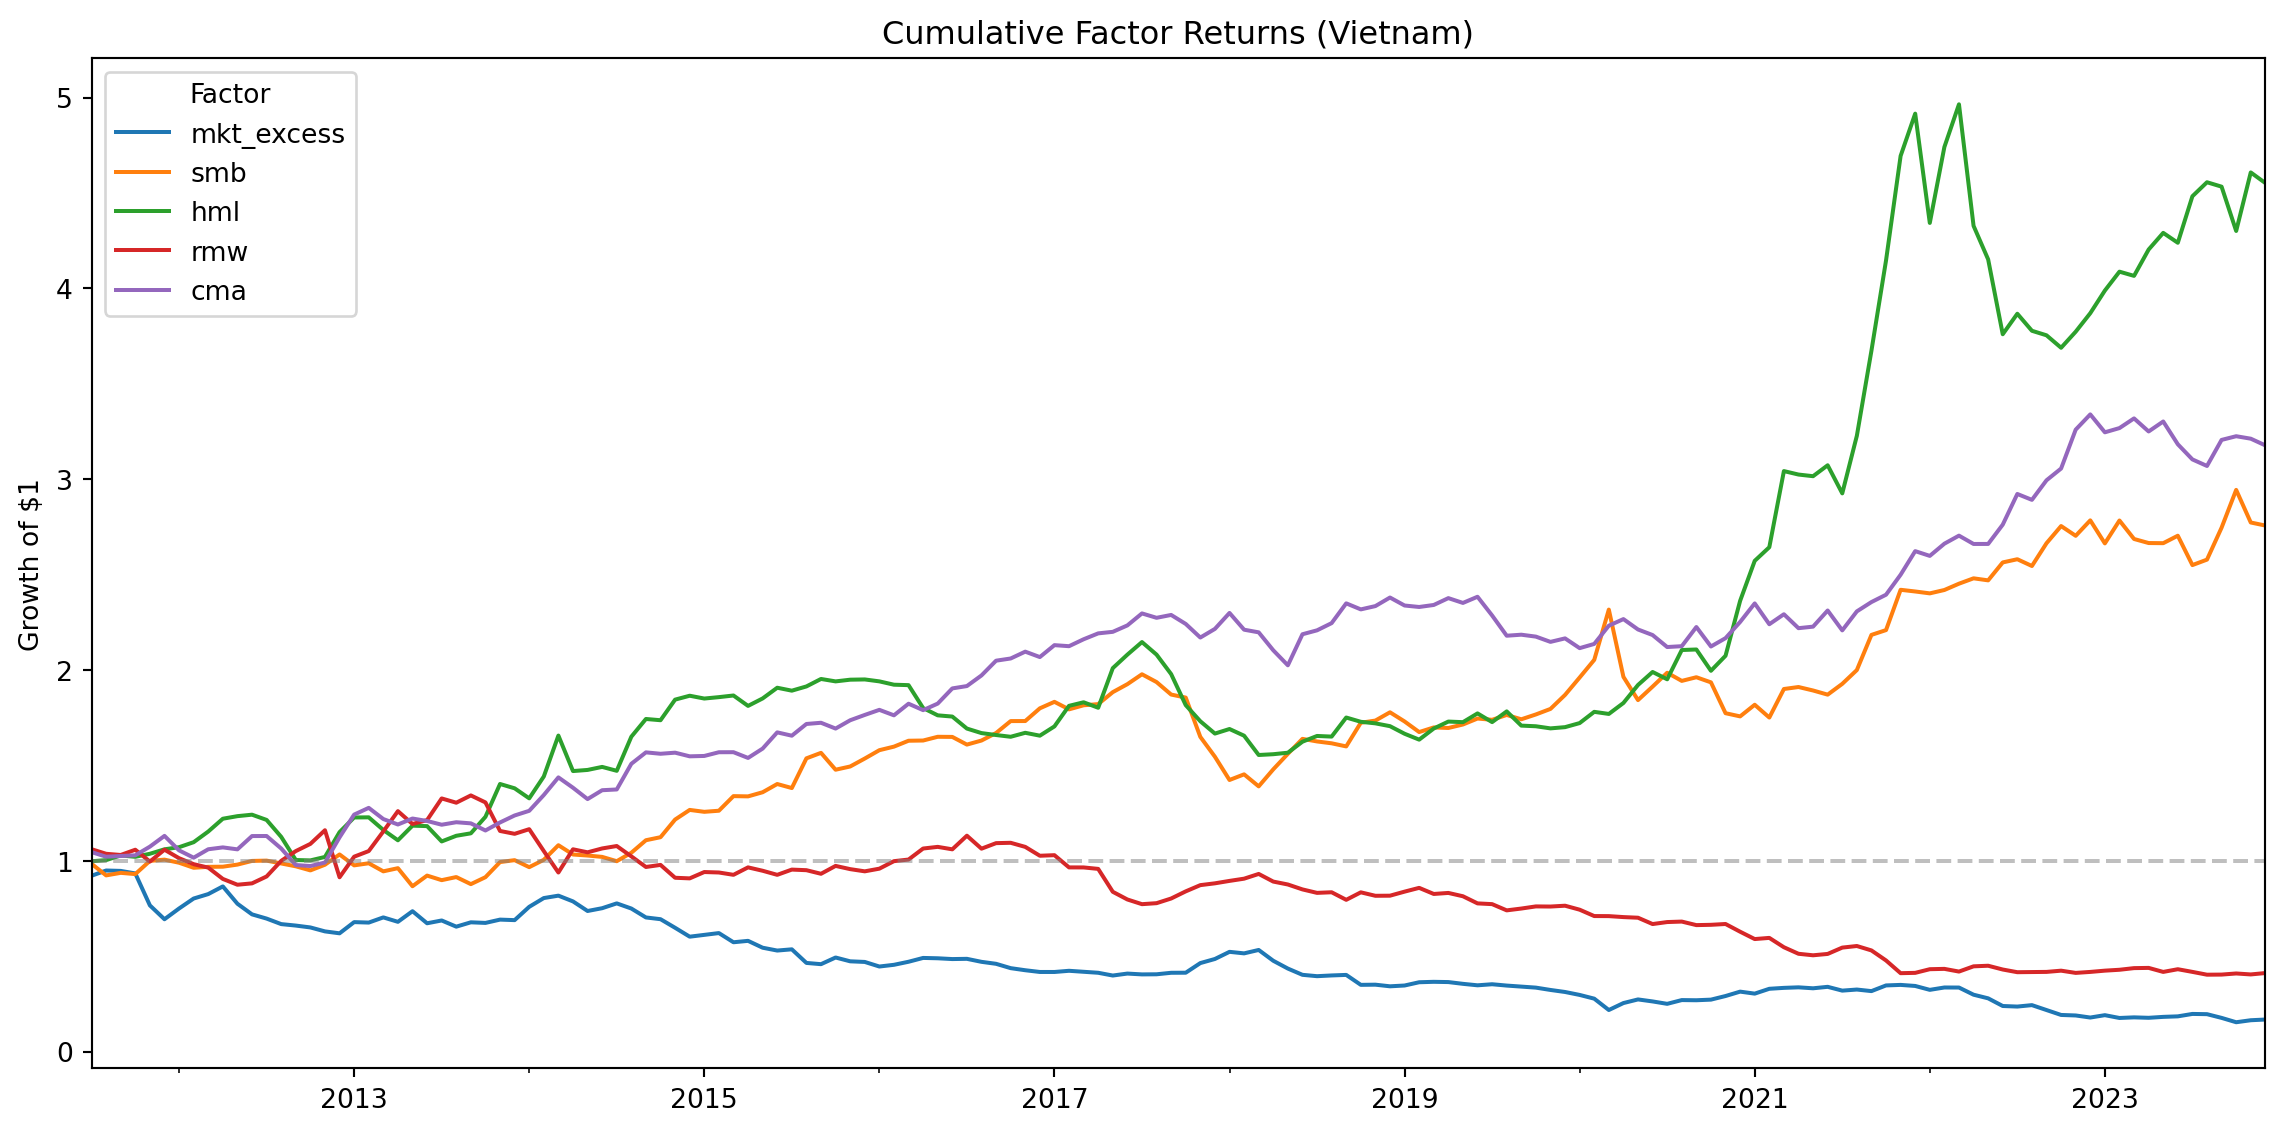

In [37]:
#| label: fig-cumulative-factors
#| out-width: 70%
#| fig-align: center
#| fig-cap: Cumulative returns of Fama-French factors for the Vietnamese market. The figure shows the growth of $1 invested in each factor portfolio.
#| fig-alt: Line chart showing cumulative factor returns over time.

# Compute cumulative returns
factors_cumulative = (factors_ff5_monthly
    .set_index("date")
    [["mkt_excess", "smb", "hml", "rmw", "cma"]]
    .add(1)
    .cumprod()
)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
factors_cumulative.plot(ax=ax)
ax.set_title("Cumulative Factor Returns (Vietnam)")
ax.set_xlabel("")
ax.set_ylabel("Growth of $1")
ax.legend(title="Factor")
ax.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [38]:
# Annualized average returns (monthly returns * 12)
factor_premiums = (factors_ff5_monthly
    [["mkt_excess", "smb", "hml", "rmw", "cma"]]
    .mean() * 12 * 100  # Annualized percentage
)

# Standard errors
factor_se = (factors_ff5_monthly
    [["mkt_excess", "smb", "hml", "rmw", "cma"]]
    .std() / np.sqrt(len(factors_ff5_monthly)) * np.sqrt(12) * 100
)

# T-statistics
factor_tstat = factor_premiums / factor_se

print("Annualized Factor Premiums (%):")
print(factor_premiums.round(2))

print("\nT-Statistics:")
print(factor_tstat.round(2))

Annualized Factor Premiums (%):
mkt_excess   -12.09
smb            9.19
hml           13.75
rmw           -5.69
cma            9.94
dtype: float64

T-Statistics:
mkt_excess    -7.30
smb            7.76
hml            9.38
rmw           -4.22
cma           10.49
dtype: float64


In [39]:
# Aggregate daily factors to monthly for comparison
factors_daily_monthly = (factors_ff5_daily
    .assign(year_month=lambda x: x["date"].dt.to_period("M"))
    .groupby("year_month")
    [["mkt_excess", "smb", "hml", "rmw", "cma"]]
    .sum()  # Sum daily returns to get monthly
    .reset_index()
)

# Merge with actual monthly factors
comparison = (factors_ff5_monthly
    .assign(year_month=lambda x: x["date"].dt.to_period("M"))
    .merge(
        factors_daily_monthly,
        on="year_month",
        suffixes=("_monthly", "_daily")
    )
)

# Correlations
for factor in ["mkt_excess", "smb", "hml", "rmw", "cma"]:
    corr = comparison[f"{factor}_monthly"].corr(comparison[f"{factor}_daily"])
    print(f"{factor}: Monthly-Daily correlation = {corr:.4f}")

mkt_excess: Monthly-Daily correlation = 0.9980
smb: Monthly-Daily correlation = 0.9950
hml: Monthly-Daily correlation = 0.9948
rmw: Monthly-Daily correlation = 0.9929
cma: Monthly-Daily correlation = 0.9884
